### Notebook structure

- **Instructions**:  set of important informations to understand the structure of the code and how to make it work.
- **Excercise 09.01**: showing the result of the application of my Genetic Algorithm (GA) on two problems: points on a circle ans points in a square.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from statistics import mode


sns.set_theme(style='whitegrid',palette='bright')

# Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_9.1' the command :  `make`. 
- To automatically execute the code run :  `make run`. 
- To clear the files `.o`  please run `make clean`.
- All output files are contained in the directory `output`, the 'c' indicates 'circle' and the 's' indicates 'square' as they refer to data about the 2 different application of the GA.


# Excercise 09.01

In this exercise, we have constructed a genetic algorithm and used it to search for a solution to the Traveling Salesman Problem (TSP). In the TSP, a system of points in space (in our case, cities randomly arranged on a plane) is considered, and the goal is  to find the shortest route that visits each city exactly once.

Genetic Algorithms (GA) are inspired by biological evolution, fist proposed by Holland in 1975. Some key concept of GAs are:

- **Population**: A genetic algorithm starts with a population of potential solutions to the problem. Each potential solution is represented as a "chromosome" in the population.

- **Chromosome**: A chromosome is a data structure that encodes a potential solution to the problem. It typically consists of a string of **genes**, where each gene represents a part of the solution. The structure of the chromosome depends on the specific problem being solved.

- **Fitness Function**: A fitness function is used to evaluate how good or bad a particular chromosome is as a solution to the problem. It assigns a numerical value (fitness score) to each chromosome in the population, indicating its quality.


In our case we considered a population of $500$ chromosomes, each chromosome consists in integers (genes) that represents $34$ cities in the order in which the salesman would visit them $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_{34}$ (the genes). Every city is characterized by a pair of spatial coordinates $\vec{x}_i$. The fitness function is the length of the path along the cities 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
 
In order to find approximate solutions the GA uses processes inspired by biological evolution such as:
- **Selection**: In the natural world, individuals with higher fitness are more likely to reproduce. In genetic algorithms, selection operators are used to choose chromosomes from the current population for reproduction. Chromosomes with higher fitness scores have a higher chance of being selected.

- **Crossover** (Recombination): Crossover is the process of combining genetic information from two parent chromosomes to create one or more offspring chromosomes. It mimics genetic recombination in biological reproduction. The specific way crossover is performed depends on the problem and encoding used.

- **Mutation**: Mutation involves making small, random changes to a chromosome. This introduces genetic diversity into the population and prevents the algorithm from getting stuck in local optima. Mutation is typically applied with a low probability.

At each evolutionary step, which in our case consisted of 700 steps, two chromosomes were selected from the population. To ensure a higher probability of selecting the best chromosome, the algorithm employed a specific selection method. After sorting the initial population based on their fitness, the algorithm selected the individual with index $j = \text{int}(M \times r^4) + 1$, where $r$ is a uniformly distributed random number within the interval $[0, 1)$. This method increased the chances of selecting the fittest chromosome. The chromosome chosen in this manner then underwent a one-point ordered crossover algorithm with a 60% probability, resulting in the generation of two new chromosomes. Each of these new chromosomes then underwent distinct mutations, with each mutation having a 10% probability of occurring. In particular we implemented the following mutations:
1. pair permutation of cities .
2. shift of $+n$ positions for $m$ contiguous cities .
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$).
4. inversion of the order in which they appear in the path of $m$ cities.

In order to reduce the degeneration we set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route. The mutations function were implemented not to modify the first index.

## Circle
First, we applied the code to optimize a path among cities randomly placed on a circumference with a diameter of 1.

### Paths

In [2]:
#loading cities' positions
x_circle , y_circle =  np.loadtxt( "es_09.1/output/circle.dat" , dtype=float  , unpack= True)
# Load fist paths
first_path_circle = np.loadtxt("es_09.1/output/first_path_c.dat", dtype=int, unpack=True)

# Rearrange cities based on the fist path order and close the path
x_circle_first, y_circle_first = x_circle[first_path_circle - 1], y_circle[first_path_circle - 1]
x_circle_first = np.append(x_circle_first, x_circle_first[0])
y_circle_first = np.append(y_circle_first, y_circle_first[0])

# Load best paths for both circle and square
best_path_circle = np.loadtxt("es_09.1/output/best_path_c.dat", dtype=int, unpack=True)
best_path_square = np.loadtxt("es_09.1/output/best_path_s.dat", dtype=int, unpack=True)

# Rearrange cities based on the best path order and close the path for the circle
x_circle_best, y_circle_best = x_circle[best_path_circle - 1], y_circle[best_path_circle - 1]
x_circle_best = np.append(x_circle_best, x_circle_best[0])
y_circle_best = np.append(y_circle_best, y_circle_best[0])



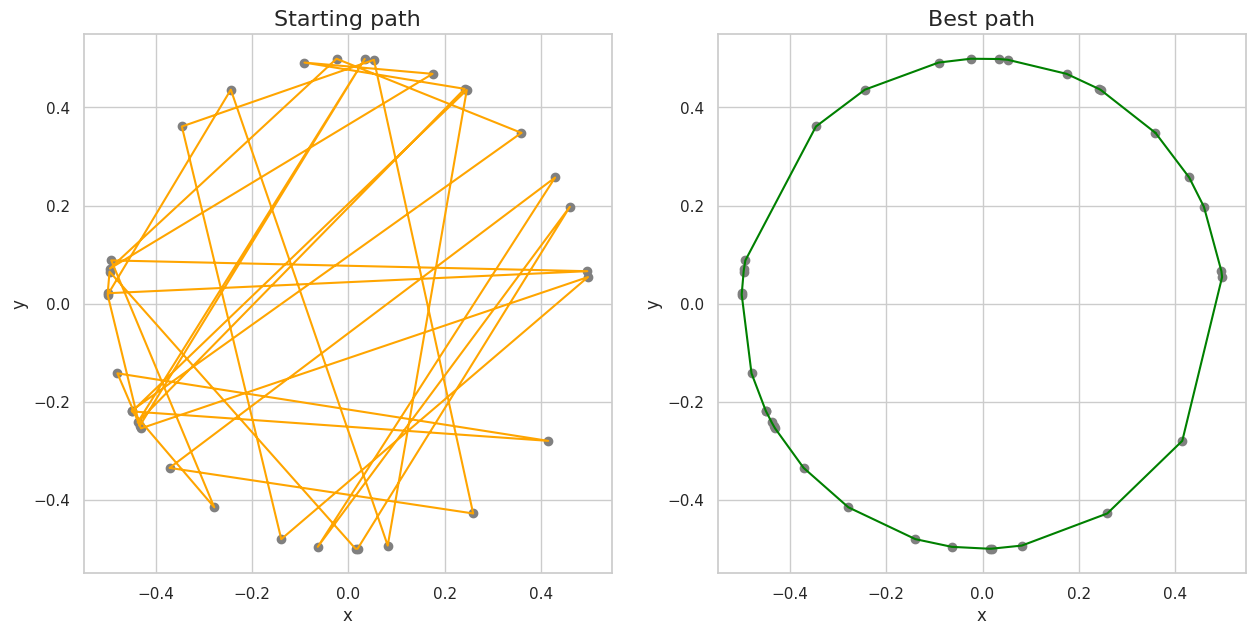

In [3]:
#Plotting picture of the fist and the final best path

fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].scatter( x_circle , y_circle,color='grey')
ax[0].plot( x_circle_first , y_circle_first , color = "orange")
ax[1].scatter( x_circle , y_circle,color='grey')
ax[1].plot(x_circle_best , y_circle_best , color = "green")

ax[0].set_title( "Starting path" , fontsize = 16)
ax[1].set_title( "Best path" , fontsize = 16)


for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

### Cost

The graphs compare the initial path with the optimized one. The excellent performance of the code is evident, as it effectively identifies the shortest path on the circumference.

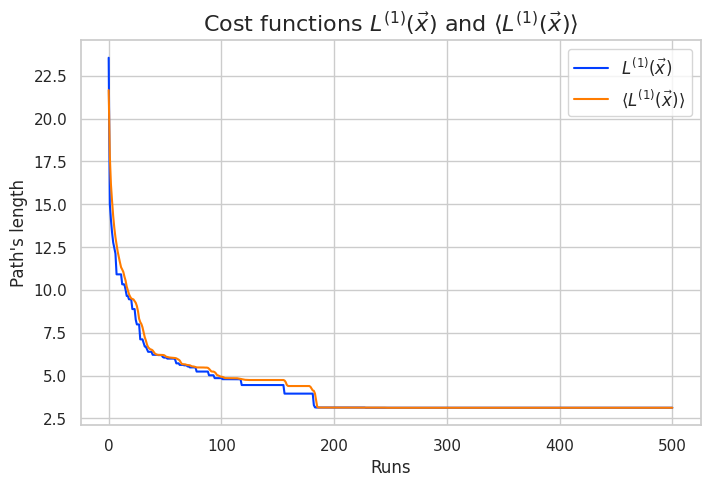

In [4]:
#Carico i file contenenti l'evoluzione del costo del cammino nelle generazioni.
cost_circ = np.loadtxt( "es_09.1/output/circle_best_cost.txt" , dtype=float)
avg_cost_circ  = np.loadtxt( "es_09.1/output/circle_ave_cost.txt" , dtype=float )
fig , ax = plt.subplots( 1 , 1 , figsize=( 8 , 5 ) )
ax.plot(np.arange(len(cost_circ)) , cost_circ , label = r"$L^{(1)}(\vec x)$"  )
ax.plot(np.arange(len(avg_cost_circ)) , avg_cost_circ , label = r"$\langle L^{(1)}(\vec x) \rangle $" )

ax.set_title( r"Cost functions $L^{(1)}(\vec x)$ and $\langle L^{(1)}(\vec x) \rangle $" , fontsize = 16)
ax.legend(loc="best" , prop={'size': 12})
ax.set_xlabel("Runs")
ax.set_ylabel("Path's length")
ax.grid(True)

The presented graph provides a detailed view of the cost function dynamics, featuring both the cost of the best path (depicted in blue) and the average cost of the superior half of the population (depicted in orange) for each generation. The following observations emerge from this analysis:

As anticipated, the cost function exhibits a consistent decline as the number of epochs progresses. This decline is indicative of substantial enhancement in the fitness levels of the chromosome population.
It is notable that, initially, the average cost remains marginally higher than the cost of the best path, a discrepancy evident during the initial 200 generations. However, subsequent to this phase, these two values converge. This convergence signifies that the superior half of the population predominantly comprises paths with exceptional fitness characteristics.
This convergence also underscores that achieving a high-quality solution can be accomplished with a number of runs considerably less than the 500 iterations executed in this case. Therefore, a more efficient approach may involve the implementation of a stopping criterion, such as requiring consistency between the best and average cost functions for a specified duration, thus ensuring optimization convergence.

## Square
We applied the code to optimize a path among 34 cities randomly placed inside a square with a side length of 1.

### Paths

In [5]:
# Load city positions
x_square , y_square =  np.loadtxt( "es_09.1/output/square.dat" , dtype=float  , unpack= True)
# Load fist paths for the square
first_path_square = np.loadtxt("es_09.1/output/first_path_s.dat", dtype=int, unpack=True)

# Rearrange cities based on the best path order and close the path
x_square_first, y_square_first = x_square[first_path_square - 1], y_square[first_path_square - 1]
x_square_first = np.append(x_square_first, x_square_first[0])
y_square_first = np.append(y_square_first, y_square_first[0])

# Load and rearrange the best paths for the square
best_path_square = np.loadtxt("es_09.1/output/best_path_s.dat", dtype=int, unpack=True)
x_square_best, y_square_best = x_square[best_path_square - 1], y_square[best_path_square - 1]
x_square_best = np.append(x_square_best, x_square_best[0])
y_square_best = np.append(y_square_best, y_square_best[0])



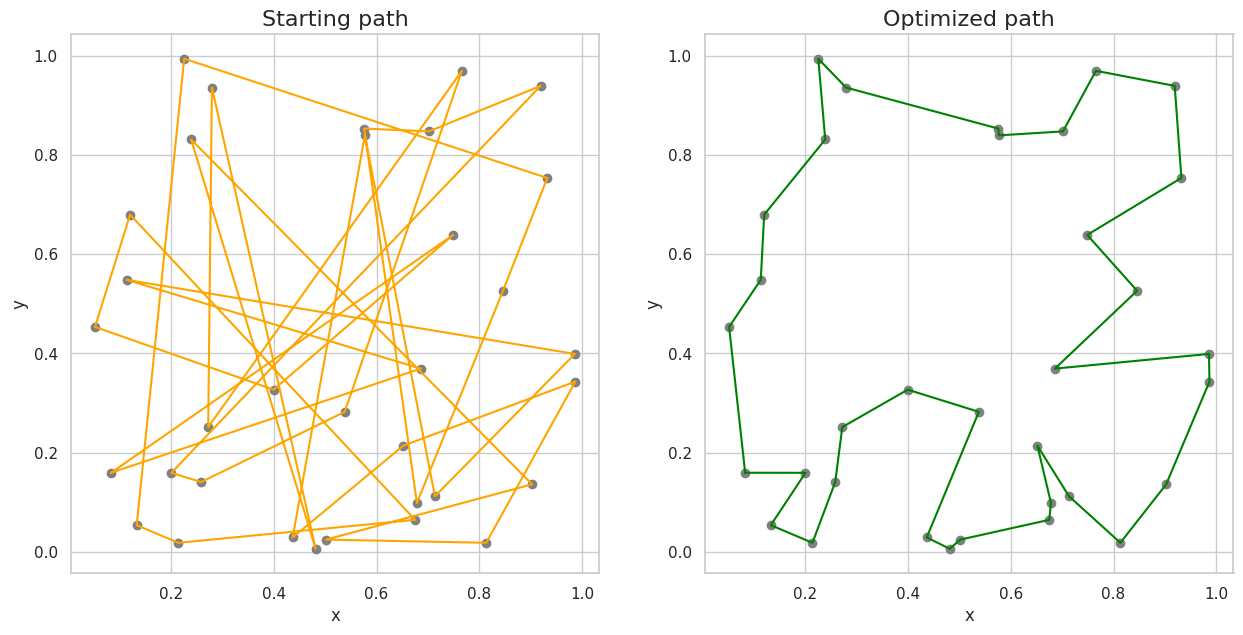

In [6]:
#Plotting picture of the best path
fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].scatter( x_square , y_square,color='grey')
ax[0].plot( x_square_first , y_square_first , color = "orange")
ax[1].scatter( x_square , y_square,color='grey')
ax[1].plot(x_square_best , y_square_best , color = "green")

ax[0].set_title( "Starting path" , fontsize = 16)
ax[1].set_title( "Optimized path" , fontsize = 16)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

### Cost 

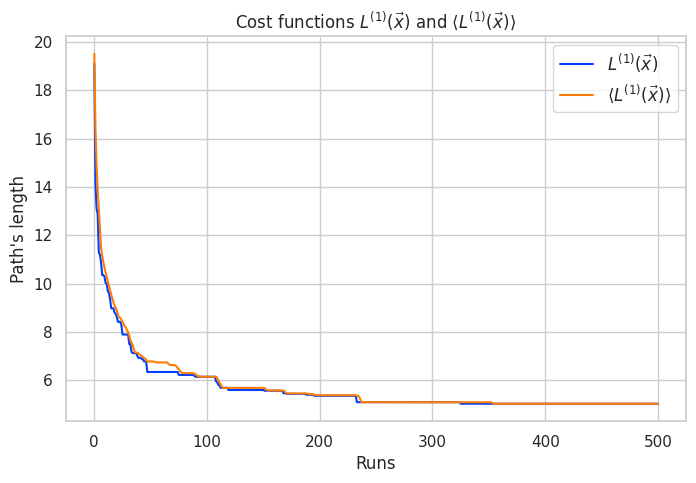

In [7]:
#Carico i file contenenti l'evoluzione del costo del cammino nelle generazioni.
cost_circ = np.loadtxt( "es_09.1/output/square_best_cost.txt" , dtype=float)
avg_cost_circ  = np.loadtxt( "es_09.1/output/square_ave_cost.txt" , dtype=float )
fig , ax = plt.subplots( 1 , 1 , figsize=( 8 , 5 ) )
ax.plot(np.arange(len(cost_circ)) , cost_circ , label = r"$L^{(1)}(\vec x)$"  )
ax.plot(np.arange(len(avg_cost_circ)) , avg_cost_circ , label = r"$\langle L^{(1)}(\vec x) \rangle $" )

ax.set_title( r"Cost functions $L^{(1)}(\vec x)$ and $\langle L^{(1)}(\vec x) \rangle $" , fontsize = 12)
ax.legend(loc="best" , prop={'size': 12})
ax.set_xlabel("Runs")
ax.set_ylabel("Path's length")
ax.grid(True)

The graph presented in the figure illustrates the dynamics of the cost function throughout the optimization process. Specifically, it depicts two key measures: the cost of the best path (in blue) and the average cost of the best-performing half of the population (in orange) for each generation.

Observations of this graph reveal that, as the number of optimization epochs increases, the cost function experiences a notable reduction, signifying improved fitness of the chromosome population. A distinct dip in the best cost function is observed around iteration 325. Interestingly, approximately 30 iterations after this point, the average cost function aligns closely with the best cost, indicative of a population comprising predominantly high-fitness paths.

It's worth noting that in this particular instance, the algorithm was run for 500 iterations. An alternative and more adaptive approach could involve introducing a stopping criterion, such as requiring that the best and average cost functions remain consistent for at least 200 successive iterations before concluding the optimization process. This would suggest stability and convergence to a robust solution. 